In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
datamma=pd.read_csv('both of unit Gas oil.csv')

In [4]:
datamma.drop(["hours",'ST MAX MW (MW)'],axis=1,inplace=True)

KeyError: "['hours' 'ST MAX MW (MW)'] not found in axis"

In [5]:
datamma.head()

,Unnamed: 0,AMBIENT PRESSURE,Ambient Tepm,CONDENSED PRESSURE,Vaccume pressure,ST Max MW Avai,Active Power ST,Flow boiler 1,Gas pressure G11,Active power G11,OTC G11,Max MW Avai G11,Flow boiler 2,Gas pressure G12,Active power G12,OTC G12,Max MW Avai G12,sum of active power
0,13:15:00,894.648,7.182,13.561,127.105,151.974,151.886,2195.436,0,142.375,540.895,143.868,2187.175,0,142.321,541.943,142.119,284.696
1,13:30:00,895.114,7.305,13.485,126.432,151.968,151.684,2193.759,0,141.932,541.509,143.713,2188.180,0,141.788,541.943,141.963,283.720
2,13:45:00,895.631,7.429,13.531,126.849,151.954,151.656,2194.453,0,141.812,541.420,143.713,2187.266,0,141.820,541.943,142.020,283.632
3,14:00:00,895.903,7.403,13.462,126.186,151.840,151.665,2193.118,0,141.853,541.626,143.736,2187.597,0,141.727,541.943,142.023,283.580
4,14:15:00,896.124,7.588,13.573,127.189,151.937,151.655,2191.821,0,141.884,541.699,143.868,2188.054,0,141.895,541.943,142.188,283.779


In [6]:
x=datamma[['Vaccume pressure','sum of active power']]
y=datamma['Active Power ST']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [10]:
slr.intercept_

121.54125036493767

In [11]:
slr.coef_

array([-0.07719203,  0.14068233])

In [12]:
from sklearn import metrics

In [13]:
y_pred = slr.predict(x_train)
print ('R^2:', metrics.r2_score(y_train,y_pred))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.7400048678710971
MAE: 0.2485378885389812
MSE: 0.13377952863511364
RMSE: 0.36575883944904686


In [14]:
corr=datamma.corr()

In [15]:
sns.heatplot.corr

AttributeError: module 'seaborn' has no attribute 'heatplot'

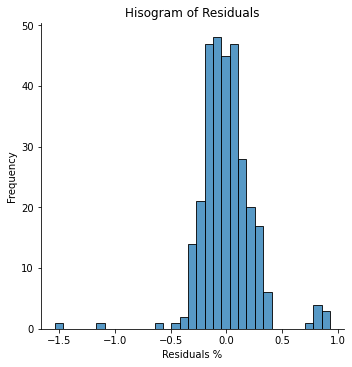

In [17]:
sns.displot(((y_train-y_pred)/y_train)*100)
plt.title('Hisogram of Residuals')
plt.xlabel('Residuals %')
plt.ylabel('Frequency')
plt.show()

In [18]:
coeffcients = pd.DataFrame([x_train.columns,slr.coef_]).T
coeffcients=coeffcients.rename(columns={0:'Attribute', 1:'coeffcients'})
coeffcients

,Attribute,coeffcients
0,Vaccume pressure,-0.077192
1,sum of active power,0.140682


In [19]:
y_test_prediction= slr.predict(x_test)
print ('R^2:', metrics.r2_score(y_test,y_test_prediction))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_prediction))
print('MSE:',metrics.mean_squared_error(y_test,y_test_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_prediction)))

R^2: 0.7858614769184624
MAE: 0.24566430008024787
MSE: 0.12540965562563564
RMSE: 0.35413225725092545


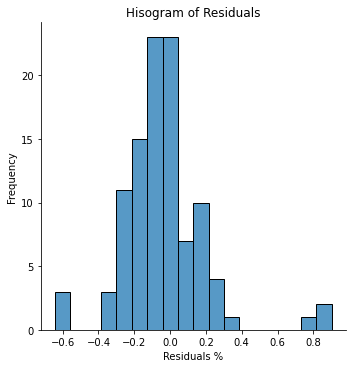

In [21]:
sns.displot(((y_test-y_test_prediction)/y_test)*100)
plt.title('Hisogram of Residuals')
plt.xlabel('Residuals %')
plt.ylabel('Frequency')
plt.show()